In [2]:
!pip install ultralytics
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.7 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 752.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/974.5 kB ? eta -:--:--
   ------------- -------------------------- 317.4/974.5 kB 9.9 MB/s eta 0:00:01
   ----------------------------- ---------- 727.0/974.5 kB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 974.5/974.5 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------- -------------------------- 0.4/1.3 MB 8.7 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.3 MB 8.9 MB/s eta 0:00:01
   -------------------------------------- - 1.2/1.3 MB 8.6 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


For each class we will randomly choose 100 pictures for trainning model

In [1]:
import os
import random
import shutil
from pathlib import Path


IMAGE_PATH = Path("C:/Users/15984/Desktop/COMP9517PROJECT/Aerial_Landscapes")
OUTPUT_PATH = Path("C:/Users/15984/Desktop/COMP9517PROJECT/skyview_yolo_dataset")  # save outside yolov5 folder


TRAIN_SIZE = 100


CLASSES = sorted([d.name for d in IMAGE_PATH.iterdir() if d.is_dir()])
CLASS_TO_ID = {cls: i for i, cls in enumerate(CLASSES)}


for split in ['train', 'val', 'test']:
    (OUTPUT_PATH / f"images/{split}").mkdir(parents=True, exist_ok=True)
    (OUTPUT_PATH / f"labels/{split}").mkdir(parents=True, exist_ok=True)


for cls in CLASSES:
    img_files = list((IMAGE_PATH / cls).glob("*.*"))
    random.shuffle(img_files)
    n_total = len(img_files)

    
    n_train = min(TRAIN_SIZE, n_total)
    n_val = int((n_total - n_train) * 0.2)  
    n_test = n_total - n_train - n_val  

    splits = {
        "train": img_files[:n_train],
        "val": img_files[n_train:n_train + n_val],
        "test": img_files[n_train + n_val:]
    }

    for split_name, files in splits.items():
        for img_path in files:
            dest_img = OUTPUT_PATH / f"images/{split_name}" / img_path.name
            dest_label = OUTPUT_PATH / f"labels/{split_name}" / (img_path.stem + ".txt")
            shutil.copy(img_path, dest_img)

            class_id = CLASS_TO_ID[cls]
            with open(dest_label, "w") as f:
                f.write(f"{class_id} 0.5 0.5 1.0 1.0\n")

Then we set up the yaml files for the model parameter

In [2]:
yaml_content = f"""
train: {OUTPUT_PATH / 'images/train'}
val: {OUTPUT_PATH / 'images/val'}

nc: {len(CLASSES)}
names: {CLASSES}
"""

with open("skyview.yaml", "w") as f:
    f.write(yaml_content)

Here we get the yolo model from ultralytics,then using the trainning set to train our model. The model we use is yolov5s Here is the url of the parameter
https://github.com/ultralytics/yolov5/blob/master/models/yolov5s.yaml

In [3]:
from ultralytics import YOLO


model = YOLO('yolov5s.pt')


model.train(
    data='skyview.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    name='skyview_yolo'
)

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:02<00:00, 7.29MB/s]


Ultralytics 8.3.107  Python-3.12.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov5s.pt, data=skyview.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=skyview_yolo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 5.35M/5.35M [00:00<00:00, 8.63MB/s]


AMP: checks passed 


train: Scanning C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\train... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 970.75it/s]

train: New cache created: C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\train.cache



val: Scanning C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\val... 798 images, 0 backgrounds, 0 corrupt: 100%|██████████| 798/798 [00:01<00:00, 522.04it/s]

val: New cache created: C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\val.cache


Plotting labels to runs\detect\skyview_yolo\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\skyview_yolo
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.77G     0.5014      3.034      1.207         44        640: 100%|██████████| 50/50 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.08it/s]

                   all        798        798      0.278       0.46      0.336       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.55G      0.164      1.539     0.9534         44        640: 100%|██████████| 50/50 [00:10<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.31it/s]

                   all        798        798      0.482      0.559        0.5      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.55G     0.1602      1.233     0.9383         50        640: 100%|██████████| 50/50 [00:10<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.15it/s]

                   all        798        798        0.6      0.586      0.585      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.55G     0.1625      1.131     0.9461         46        640: 100%|██████████| 50/50 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.23it/s]

                   all        798        798      0.637      0.681      0.719      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.55G     0.1506      1.039     0.9398         54        640: 100%|██████████| 50/50 [00:10<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.36it/s]

                   all        798        798      0.718      0.739      0.759      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.55G     0.1424      1.001     0.9329         51        640: 100%|██████████| 50/50 [00:10<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.37it/s]

                   all        798        798      0.719      0.621      0.679      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.55G     0.1378     0.9251     0.9237         47        640: 100%|██████████| 50/50 [00:10<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.23it/s]

                   all        798        798       0.64      0.635      0.688      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.55G     0.1237     0.8443     0.9158         53        640: 100%|██████████| 50/50 [00:10<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.21it/s]

                   all        798        798      0.663      0.666      0.715      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.55G     0.1201     0.8111      0.917         54        640: 100%|██████████| 50/50 [00:10<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.13it/s]

                   all        798        798      0.773      0.699      0.791      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.55G     0.1136     0.8087     0.9122         43        640: 100%|██████████| 50/50 [00:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        798        798      0.791      0.747      0.823      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.55G     0.1082     0.7766     0.9118         54        640: 100%|██████████| 50/50 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.42it/s]

                   all        798        798      0.812      0.799      0.863      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.55G     0.1039     0.7217     0.9124         50        640: 100%|██████████| 50/50 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        798        798      0.842      0.724      0.789      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.55G     0.1022     0.7392      0.915         47        640: 100%|██████████| 50/50 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.42it/s]

                   all        798        798      0.804      0.693      0.778      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.55G    0.09938     0.6461      0.908         51        640: 100%|██████████| 50/50 [00:10<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.22it/s]

                   all        798        798      0.743      0.783      0.834      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.55G    0.09892     0.6493     0.9055         49        640: 100%|██████████| 50/50 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        798        798      0.772      0.799      0.848      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.55G    0.09539     0.6097     0.8985         43        640: 100%|██████████| 50/50 [00:09<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.27it/s]

                   all        798        798      0.855      0.751      0.873      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.55G    0.08955     0.6157     0.9009         40        640: 100%|██████████| 50/50 [00:10<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.40it/s]

                   all        798        798      0.824      0.827      0.882      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.55G     0.0868     0.5898     0.9004         47        640: 100%|██████████| 50/50 [00:09<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.34it/s]

                   all        798        798      0.824      0.841      0.891      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.55G    0.08379      0.526     0.9021         43        640: 100%|██████████| 50/50 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.22it/s]

                   all        798        798      0.829      0.866      0.924      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.55G    0.08041     0.5327     0.9015         48        640: 100%|██████████| 50/50 [00:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.28it/s]

                   all        798        798      0.857      0.796      0.893      0.886


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.55G     0.1003     0.5456     0.9388         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        798        798      0.801      0.785      0.867      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.55G    0.07667     0.3527     0.9242         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.28it/s]

                   all        798        798      0.792      0.816      0.881      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.55G    0.06573     0.3141     0.9246         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        798        798      0.849      0.823      0.885      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.55G    0.06604     0.3048     0.9066         16        640: 100%|██████████| 50/50 [00:09<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        798        798      0.842      0.882      0.917      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.55G    0.05677     0.2775     0.9127         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.22it/s]

                   all        798        798      0.878      0.848      0.922      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.55G     0.0539     0.2691     0.9102         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.27it/s]

                   all        798        798      0.863      0.919      0.931      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.55G    0.05258     0.2109       0.91         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.31it/s]

                   all        798        798      0.888      0.829       0.92       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.55G    0.04782     0.2068     0.9201         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        798        798      0.881      0.849      0.923      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.55G    0.04585     0.1855     0.9157         16        640: 100%|██████████| 50/50 [00:09<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.36it/s]

                   all        798        798        0.9      0.843      0.923      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.55G    0.04564     0.1433     0.8971         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.38it/s]

                   all        798        798      0.882      0.905      0.938      0.938



30 epochs completed in 0.147 hours.
Optimizer stripped from runs\detect\skyview_yolo\weights\last.pt, 18.5MB
Optimizer stripped from runs\detect\skyview_yolo\weights\best.pt, 18.5MB

Validating runs\detect\skyview_yolo\weights\best.pt...
Ultralytics 8.3.107  Python-3.12.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv5s summary (fused): 84 layers, 9,117,341 parameters, 0 gradients, 23.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.21it/s]


                   all        798        798      0.882      0.905      0.938      0.938
           Agriculture          9          9       0.68      0.778      0.837      0.837
               Airport          7          7      0.827      0.714       0.73       0.73
                 Beach         17         17      0.918      0.941       0.99       0.99
                  City         19         19      0.845      0.859      0.928      0.928
                Desert         31         31      0.908      0.957      0.946      0.946
                Forest         24         24      0.911      0.849      0.925      0.925
             Grassland         22         22      0.718      0.927      0.937      0.937
               Highway         36         36      0.885      0.944       0.96       0.96
                  Lake         40         40      0.891      0.817      0.924      0.924
              Mountain         69         69      0.975      0.928      0.982      0.982
               Parkin

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002163551B380>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

Now we get the model and its best hyperparameter, then using this classfier on our test set
we have the results the whole prcess is really quick
Speed: 3.2ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

In [4]:

model = YOLO('runs/detect/skyview_yolo/weights/best.pt')


results = model.predict(
    source=str(OUTPUT_PATH / 'images/test'),
    conf=0.25,
    save=True
)

c:\Users\15984\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 1/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\001.jpg: 640x640 1 Residential, 34.0ms
image 2/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\002.jpg: 640x640 1 River, 35.2ms
image 3/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\003.jpg: 640x640 1 River, 31.4ms
image 4/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\004.jpg: 640x640 1 Railway, 33.1ms
image 5/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\005.jpg: 640x640 1 River, 8.7ms
image 6/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\006.jpg: 640x640 1 River, 8.6ms
image 7/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\007.jpg: 640x640 1 River, 8.5ms
image 8/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\008.jpg: 640x640 1 River, 8.5ms
image 9/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_y

Then evaluate the model generally we can get the exact metrics

In [6]:
import numpy as np
# First evaluate the model to get metrics
metrics = model.val()
# Display the most important evaluation results
print("\n=== Model Evaluation Results ===")
print(f"mAP50: {metrics.box.map50:.3f}")  # Most important metric
print(f"Average Detection Confidence: {np.mean([box.conf.mean().item() for r in results for box in r.boxes]):.3f}")
print(f"Total Test Images: {len(results)}")



Ultralytics 8.3.107  Python-3.12.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)


val: Scanning C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\val.cache... 798 images, 0 backgrounds, 0 corrupt: 100%|██████████| 798/798 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:08<00:00,  5.84it/s]


                   all        798        798      0.882      0.905      0.938      0.938
           Agriculture          9          9      0.679      0.778       0.84       0.84
               Airport          7          7      0.825      0.714       0.73       0.73
                 Beach         17         17      0.917      0.941       0.99       0.99
                  City         19         19      0.845      0.859      0.928      0.928
                Desert         31         31      0.908      0.955      0.948      0.948
                Forest         24         24      0.911      0.849      0.925      0.925
             Grassland         22         22      0.718      0.927      0.937      0.937
               Highway         36         36      0.885      0.944      0.964      0.964
                  Lake         40         40      0.891      0.817      0.924      0.924
              Mountain         69         69      0.975      0.928      0.982      0.982
               Parkin

Choosing one to see the classification result 


=== Classification Results ===


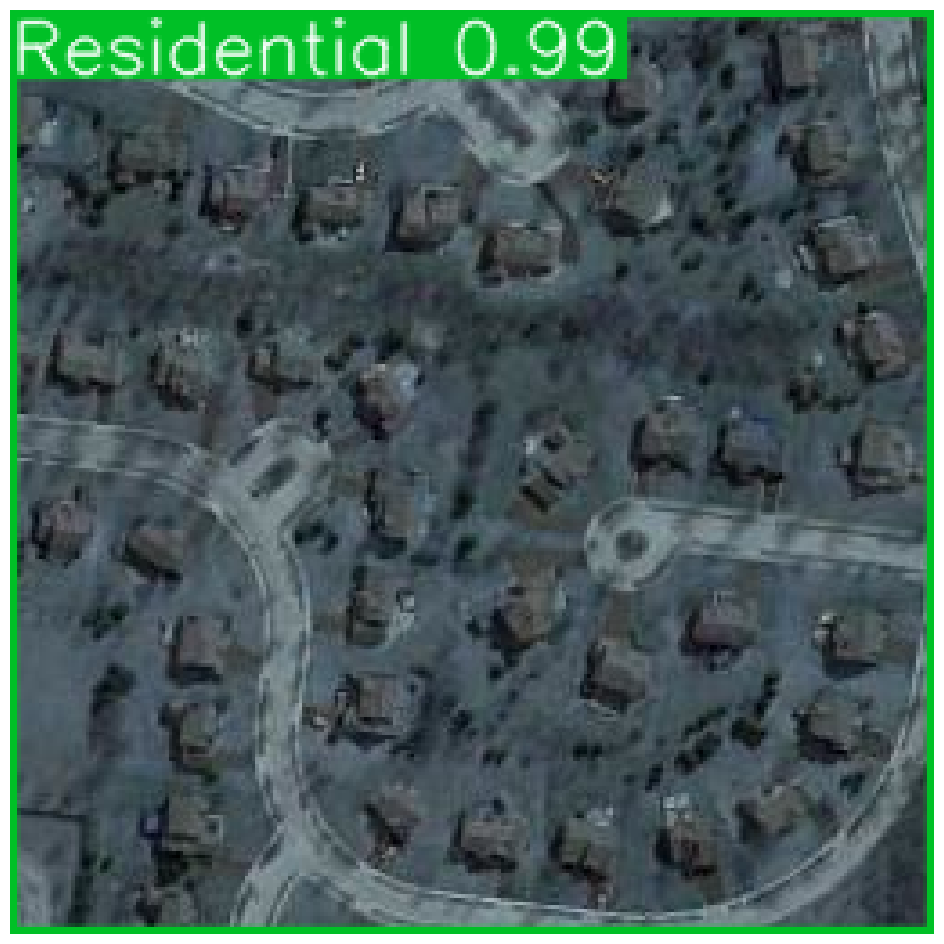


Number of Detections: 1
Class: Residential, Confidence: 0.99


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Display a classified image result
if len(results) > 0:
    print("\n=== Classification Results ===")
    result = results[0]
    
    # Get the classified image
    img = result.plot()
    
    # Create a new figure and display the image
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(img)
    ax.axis('off')
    plt.show()
    
    # Print detection details
    print(f"\nNumber of Detections: {len(result.boxes)}")
    for box in result.boxes:
        print(f"Class: {CLASSES[int(box.cls)]}, Confidence: {box.conf.item():.2f}")

Then we can have an analysis on our yolov5s model, The YOLO model demonstrates strong overall performance with an mAP50 of 0.938 and an average detection confidence of 0.949 across 800 test images. The model performs exceptionally well on several classes, particularly Residential areas (0.991 mAP50), Ports (0.994 mAP50), Railways (0.984 mAP50), and Mountains (0.982 mAP50), showing high precision and recall values for these categories. However, there are some areas that need improvement, particularly in the detection of Airports (0.73 mAP50) and Agricultural areas (0.84 mAP50), which show lower precision and recall values. These weaker performing classes also happen to have the smallest number of training instances (7 and 9 respectively), suggesting that the model's performance might be improved by increasing the training data for these specific classes. The model's processing speed is efficient, with a total processing time of 6.7ms per image, distributed across preprocessing (0.3ms), inference (5.6ms), and postprocessing (0.8ms) stages. The class distribution in the dataset shows significant imbalance, with some classes like River having 151 instances while others like Airport have only 7 instances. This imbalance might be contributing to the varying performance across classes, and addressing this through techniques like oversampling or weighted loss functions could potentially improve the model's overall performance.

In the next part I will try to use different types of What if the dataset is resampled to make it an imbalanced classification problem? For example, the number of images might follow a long-tail distribution.

In [9]:
import os
import random
import shutil
from pathlib import Path


IMAGE_PATH = Path("C:/Users/15984/Desktop/COMP9517PROJECT/Aerial_Landscapes")
OUTPUT_PATH = Path("C:/Users/15984/Desktop/COMP9517PROJECT/skyview_yolo_dataset")  # save outside yolov5 folder


TRAIN_SIZES = {
    "Agriculture": 20,
    "Airport": 30,
    "Beach": 40,
    "City": 50,
    "Desert": 60,
    "Forest": 70,
    "Grassland": 80,
    "Highway": 90,
    "Lake": 100,
    "Mountain": 20,
    "Parking": 30,
    "Port": 40,
    "Railway": 50,
    "Residential": 60,
    "River": 70
}


CLASSES = sorted([d.name for d in IMAGE_PATH.iterdir() if d.is_dir()])
CLASS_TO_ID = {cls: i for i, cls in enumerate(CLASSES)}


for split in ['train', 'val', 'test']:
    (OUTPUT_PATH / f"images/{split}").mkdir(parents=True, exist_ok=True)
    (OUTPUT_PATH / f"labels/{split}").mkdir(parents=True, exist_ok=True)


for cls in CLASSES:
    img_files = list((IMAGE_PATH / cls).glob("*.*"))
    random.shuffle(img_files)
    n_total = len(img_files)

    
    n_train = min(TRAIN_SIZES.get(cls, 100), n_total)
    n_val = int((n_total - n_train) * 0.2)  
    n_test = n_total - n_train - n_val   

    splits = {
        "train": img_files[:n_train],
        "val": img_files[n_train:n_train + n_val],
        "test": img_files[n_train + n_val:]
    }

    for split_name, files in splits.items():
        for img_path in files:
            dest_img = OUTPUT_PATH / f"images/{split_name}" / img_path.name
            dest_label = OUTPUT_PATH / f"labels/{split_name}" / (img_path.stem + ".txt")
            shutil.copy(img_path, dest_img)

            class_id = CLASS_TO_ID[cls]
            with open(dest_label, "w") as f:
                f.write(f"{class_id} 0.5 0.5 1.0 1.0\n")

In [10]:
from ultralytics import YOLO


model = YOLO('yolov5s.pt')


model.train(
    data='skyview.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    name='skyview_yolo'
)

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.107  Python-3.12.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov5s.pt, data=skyview.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=skyview_yolo2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid

train: Scanning C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\train... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 1079.06it/s]

train: New cache created: C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\train.cache



val: Scanning C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\val... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:01<00:00, 517.77it/s]


val: New cache created: C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\val.cache
Plotting labels to runs\detect\skyview_yolo2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\skyview_yolo2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.48G     0.4941      3.086      1.196         44        640: 100%|██████████| 50/50 [00:11<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        800        800      0.549      0.285      0.315      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.04G     0.1688      1.622      0.955         44        640: 100%|██████████| 50/50 [00:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.23it/s]

                   all        800        800      0.598      0.506      0.497      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.04G     0.1646      1.275     0.9393         50        640: 100%|██████████| 50/50 [00:10<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.12it/s]

                   all        800        800      0.504      0.536      0.528      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.04G     0.1613      1.145     0.9474         46        640: 100%|██████████| 50/50 [00:10<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.25it/s]

                   all        800        800      0.744      0.586      0.655      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.04G     0.1549      1.069     0.9425         54        640: 100%|██████████| 50/50 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.27it/s]

                   all        800        800      0.654      0.636      0.678      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.04G     0.1385      1.007       0.93         51        640: 100%|██████████| 50/50 [00:10<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        800        800       0.67      0.712      0.747       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.04G      0.135     0.9432     0.9217         47        640: 100%|██████████| 50/50 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.22it/s]

                   all        800        800      0.776      0.623      0.751      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.04G      0.128     0.8879     0.9181         53        640: 100%|██████████| 50/50 [00:10<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.11it/s]

                   all        800        800      0.729      0.645      0.712      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.04G      0.125      0.819     0.9169         54        640: 100%|██████████| 50/50 [00:10<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.21it/s]

                   all        800        800      0.841      0.709      0.812      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.04G      0.116     0.8105     0.9142         43        640: 100%|██████████| 50/50 [00:10<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.38it/s]

                   all        800        800      0.793      0.738      0.797      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.04G     0.1091     0.7562     0.9109         54        640: 100%|██████████| 50/50 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.36it/s]

                   all        800        800      0.723      0.736      0.772      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.04G     0.1066     0.7514     0.9138         50        640: 100%|██████████| 50/50 [00:09<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.41it/s]

                   all        800        800      0.774      0.704       0.79      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.04G     0.1012     0.7082     0.9147         47        640: 100%|██████████| 50/50 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.37it/s]

                   all        800        800      0.669       0.76      0.797      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.04G    0.09686     0.6806     0.9075         51        640: 100%|██████████| 50/50 [00:10<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.24it/s]

                   all        800        800      0.793      0.776      0.866      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.04G    0.09549     0.6432     0.9039         49        640: 100%|██████████| 50/50 [00:10<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.37it/s]

                   all        800        800      0.772      0.781      0.851      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.04G    0.09167     0.6291      0.897         43        640: 100%|██████████| 50/50 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.42it/s]

                   all        800        800      0.774      0.714      0.823      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.04G    0.09016     0.6429     0.9014         40        640: 100%|██████████| 50/50 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.32it/s]

                   all        800        800      0.744      0.785      0.845      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.04G    0.08662     0.5664      0.901         47        640: 100%|██████████| 50/50 [00:09<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        800        800      0.846      0.799      0.883       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.04G    0.08455      0.576     0.9014         43        640: 100%|██████████| 50/50 [00:10<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        800        800      0.858        0.8      0.892      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.04G    0.08031     0.5282     0.9019         48        640: 100%|██████████| 50/50 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.20it/s]

                   all        800        800      0.816       0.86      0.898      0.893


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.04G     0.1014     0.5491     0.9377         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.33it/s]

                   all        800        800      0.789      0.869      0.903      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.04G     0.0768     0.3606     0.9218         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.40it/s]

                   all        800        800      0.865      0.817      0.889      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.04G     0.0635     0.2847     0.9226         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.41it/s]

                   all        800        800      0.789      0.832      0.883      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.04G    0.06011     0.3293     0.9032         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        800        800      0.834       0.83      0.898      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.04G      0.058     0.2777     0.9123         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.25it/s]

                   all        800        800      0.847      0.839      0.898      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.04G     0.0532     0.2657     0.9104         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        800        800      0.806      0.837      0.883      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.04G    0.05325     0.2366     0.9107         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        800        800       0.79      0.896       0.89      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.04G    0.04953     0.2081     0.9224         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.43it/s]

                   all        800        800      0.916      0.873      0.916      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.04G    0.04651     0.1932     0.9159         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.34it/s]

                   all        800        800      0.906      0.867      0.916      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.04G     0.0467     0.1816     0.8985         16        640: 100%|██████████| 50/50 [00:10<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        800        800      0.873      0.864      0.912      0.912



30 epochs completed in 0.147 hours.
Optimizer stripped from runs\detect\skyview_yolo2\weights\last.pt, 18.5MB
Optimizer stripped from runs\detect\skyview_yolo2\weights\best.pt, 18.5MB

Validating runs\detect\skyview_yolo2\weights\best.pt...
Ultralytics 8.3.107  Python-3.12.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv5s summary (fused): 84 layers, 9,117,341 parameters, 0 gradients, 23.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.95it/s]


                   all        800        800      0.905      0.867      0.916      0.915
           Agriculture         11         11      0.603      0.727       0.61       0.61
               Airport          5          5          1      0.374      0.545      0.545
                 Beach         12         12      0.805       0.75      0.808      0.808
                  City         24         24      0.855      0.917      0.971      0.971
                Desert         17         17      0.938      0.893      0.982      0.982
                Forest         24         24      0.898      0.875      0.965      0.965
             Grassland         30         30      0.811      0.967      0.973      0.973
               Highway         27         27      0.956      0.963      0.988      0.988
                  Lake         44         44      0.904      0.955       0.98       0.98
              Mountain         58         58      0.927       0.87      0.961      0.959
               Parkin

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021604958EF0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

In [12]:
model = YOLO('runs/detect/skyview_yolo2/weights/best.pt')


results = model.predict(
    source=str(OUTPUT_PATH / 'images/test'),
    conf=0.25,
    save=True
)



image 1/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\001.jpg: 640x640 1 River, 31.1ms
image 2/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\002.jpg: 640x640 1 River, 32.0ms
image 3/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\003.jpg: 640x640 1 River, 31.3ms
image 4/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\004.jpg: 640x640 1 Residential, 18.7ms
image 5/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\005.jpg: 640x640 1 Port, 8.4ms
image 6/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\006.jpg: 640x640 1 Residential, 8.6ms
image 7/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\007.jpg: 640x640 1 Railway, 8.6ms
image 8/800 C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\images\test\008.jpg: 640x640 1 River, 15.6ms
image 9/800 C:\Users\15984\Desktop\COMP9517PROJECT\sk

In [13]:
import numpy as np
# First evaluate the model to get metrics
metrics = model.val()
# Display the most important evaluation results
print("\n=== Model Evaluation Results ===")
print(f"mAP50: {metrics.box.map50:.3f}")  # Most important metric
print(f"Average Detection Confidence: {np.mean([box.conf.mean().item() for r in results for box in r.boxes]):.3f}")
print(f"Total Test Images: {len(results)}")

Ultralytics 8.3.107  Python-3.12.0 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)


val: Scanning C:\Users\15984\Desktop\COMP9517PROJECT\skyview_yolo_dataset\labels\val.cache... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:08<00:00,  5.62it/s]


                   all        800        800      0.905      0.867      0.916      0.915
           Agriculture         11         11      0.603      0.727       0.61       0.61
               Airport          5          5          1      0.377      0.545      0.545
                 Beach         12         12      0.806       0.75      0.808      0.808
                  City         24         24      0.856      0.917      0.971      0.971
                Desert         17         17      0.938      0.888      0.982      0.982
                Forest         24         24      0.899      0.875      0.965      0.965
             Grassland         30         30      0.811      0.967      0.973      0.973
               Highway         27         27      0.956      0.963      0.988      0.988
                  Lake         44         44      0.904      0.955       0.98       0.98
              Mountain         58         58      0.927      0.871      0.961      0.959
               Parkin

We can see a clear drop in the agriculture aiport and beach because of the imbalanced tranning set,but the yolo auto adaptor show still a great performance in total dectection. This demonstrate that it is a robusted and magnifcient model in the CV field